##  ANN with TensorFlow

#### What is ANN?

Artificial Neural Networks (ANN) is a supervised learning system built of a large number of simple elements, called neurons or perceptrons. Each neuron can make simple decisions, and feeds those decisions to other neurons, organized in interconnected layers.

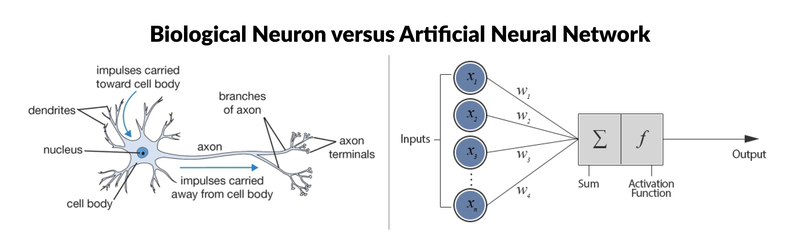

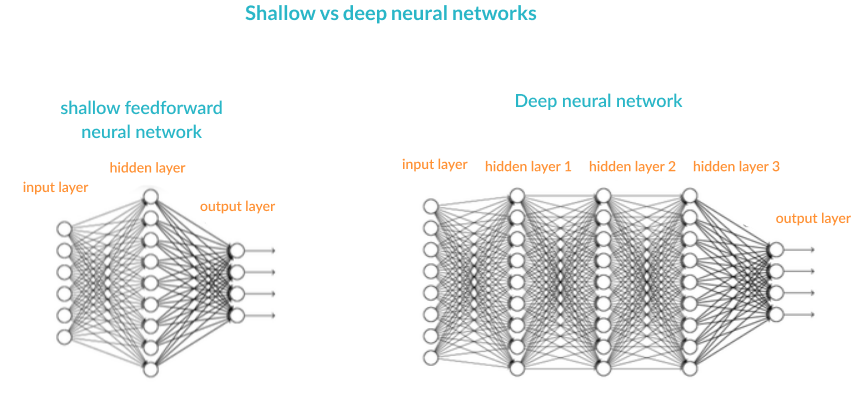

#### What is Activation Function?

If we do not apply a Activation function then the output signal would simply be a simple linear function.A linear function is just a polynomial of one degree.

- Sigmoid
- Tanh
- ReLu
- LeakyReLu
- SoftMax

#### What is Back Propagation? 

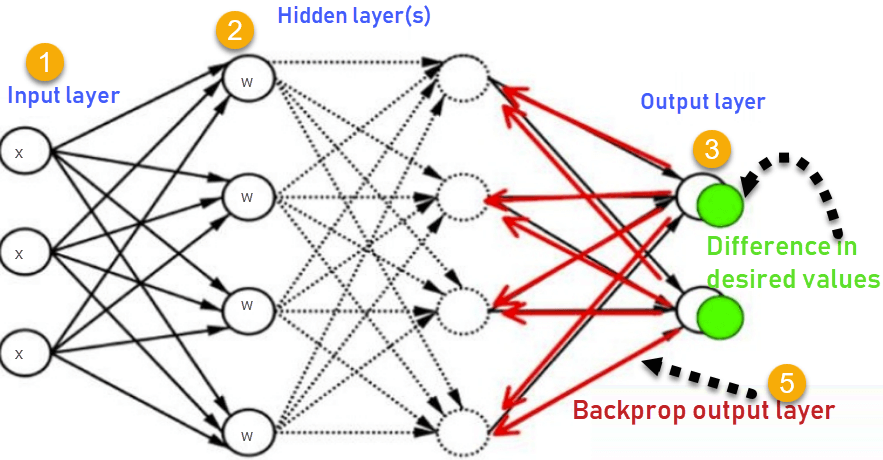

#### Steps for building your first ANN 

- Data Preprocessing
- Add input layer
- Random w init
- Add Hidden Layers
- Select Optimizer, Loss, and Performance Metrics
- Compile the model
- use model.fit to train the model
- Evaluate the model
- Adjust optimization parameters or model if needed

In [1]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 11.5 MB/s eta 0:00:00


In [2]:
!pip install tensorflow

In [8]:
pip install mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [6]:
# Activer le GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [9]:
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt

import tensorflow
print(tensorflow.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.utils import plot_model

2.11.0


In [10]:
# Garantir la reproductibilité des résultats  ? 
# Ressources : 
# https://medium.com/@ODSC/properly-setting-the-random-seed-in-ml-experiments-not-as-simple-as-you-might-imagine-219969c84752
# https://stackoverflow.com/questions/51249811/reproducible-results-in-tensorflow-with-tf-set-random-seed
# voir la tte dernière rép de begoodpy

os.environ['TF_DETERMINISTIC_OPS'] = '1' #  c'est la ligne la plus importante
os.environ['PYTHONHASHSEED'] = '42'
os.environ['CUDA_VISIBLE_DEVICES'] = '' #  c'est facultatif
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Pb de classification binaire

In [3]:
# Pb de classification : 2 droites

data2 = pd.read_excel('artificial_generator.xlsx')
data2
# data2.describe()
# data2[['X1', 'X2']].boxplot()
# data2.Y.value_counts(normalize=True)

,X1,X2,Y
0,-0.354592,0.675646,neg
1,0.463945,0.681335,neg
2,0.001260,0.294081,pos
3,0.427305,0.592392,neg
4,-0.390878,0.823335,neg
...,...,...,...
1995,0.193988,0.538722,pos
1996,0.061337,0.997691,pos
1997,0.082539,0.155517,pos
1998,0.184205,0.556123,pos


pos    0.5355
neg    0.4645
Name: Y, dtype: float64

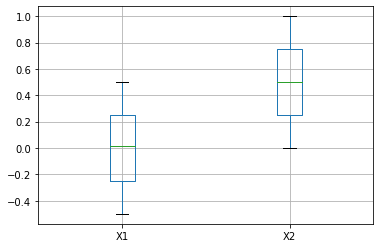

In [8]:
# Pb de classification : 4 droites
data4 = pd.read_excel('artificial_generator.xlsx', sheet_name = 1)
data4
data4.describe()
data4.boxplot()
data4.Y.value_counts(normalize=True)

In [11]:
# data2 et data 4 : Y est str => Transformer Y en numeric (LabelEncoder)
le = LabelEncoder()
# le.fit(data2['Y']) 
# le.classes_
# le.transform(data2['Y']) 
# le.fit_transform(data2['Y']) 

# data2['Y'] = le.fit_transform(data2['Y'])
data4['Y'] = le.fit_transform(data4['Y'])
data2.head()
# data4.head()

,X1,X2,Y
0,-0.354592,0.675646,0
1,0.463945,0.681335,0
2,0.001260,0.294081,1
3,0.427305,0.592392,0
4,-0.390878,0.823335,0


Text(0.5, 1.0, 'data4')

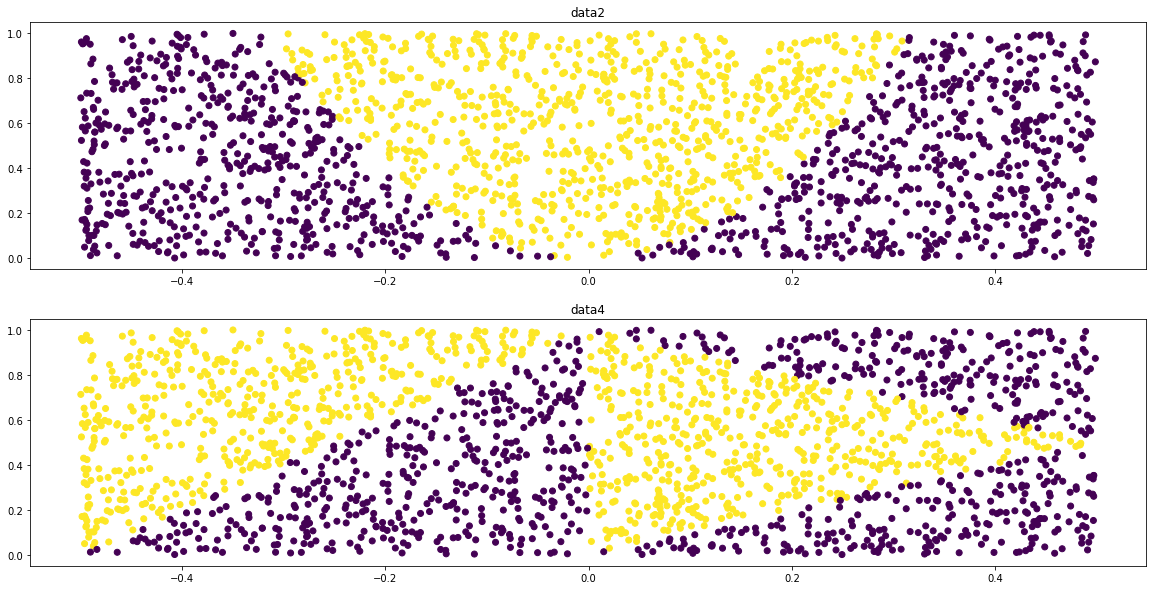

In [12]:
# Ns spécifions X1 en abscisse, X2 en ordonnée, et ns utilisons Y pour distinguer les points.

plt.figure(figsize = (20, 10))
plt.subplot(2, 1, 1)
plt.scatter(data2['X1'], data2['X2'], c = data2['Y']) # , edgecolors='red'
plt.title("data2")
plt.subplot(2, 1, 2)
plt.scatter(data4['X1'], data4['X2'], c = data4['Y']) # , edgecolors='red'
plt.title('data4')

# S : Manifestement, les classes ne sont pas séparables linéairement.
# Rq : Ds data2, la frontière est plutôt de forme parabolique, il est impossible de produire une droite (unique) permettant d’isoler les « pos » des « neg ». 
# Ns avons plutôt besoin de 2 droites.
# Rq : Ds data4, ns avons besoin de 4 droites !

# Building ANN with tensorflow 

In [13]:
# Exemple de création d'un NN avec `Functional API` 

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Couche d'entrée
inputs = Input(shape=(2,))
# inputs.get_shape()
# inputs.name

# Couches cachées : 
x = Dense(3, activation='tanh')(inputs)
# x = Dense(3, activation='relu')(x)

# Couche de sortie
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## Exemple 
![mlp](./mlp.png)

![](weight.png)

In [22]:
# Exemple de création d'un NN avec `Sequential API` 
# La classe Sequential est une structure, initialement vide, qui permet de définir un empilement de couches de neurones
nn = Sequential()
# Note : Sequential parce que les couches de neurones vont être ajoutées séquentiellement.

In [23]:
nn.get_config()

{'name': 'sequential', 'layers': []}

In [24]:
# Ns ajoutons successivement deux objets Dense : 
# le 1er fait la jonction entre la couche d’entrée
# (d’où l’option input_dim indiquant le nombre de features) et la couche cachée (units = 3) neurones ; 
# le second entre cette dernière couche cachée et celle de sortie (à un seul neurone, units = 1). 
# Ns avons une fonction d’activation sigmoide ds les deux cas.
# Note : Dense parce que tous les neurones de couche précédente seront connectés à tous les neurones de la couche suivante.
#  => On dit aussi Fully Connected

In [15]:
## Façon plus éco (moins de lignes de code) :  

nn = Sequential()
nn.add(Dense(units=3, input_dim=2, activation='sigmoid'))
nn.add(Dense(units=1, activation='sigmoid'))
nn.get_weights()
nn.summary()
# del nn

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [28]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [16]:
nn.get_weights()

[array([[-0.7148894 , -0.17783499, -1.086356  ],
        [ 0.8784708 ,  0.86313486, -0.19202411]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.73989034],
        [0.45055282],
        [1.1423756 ]], dtype=float32),
 array([0.], dtype=float32)]

In [90]:
# Les valeurs des pondérations initialisées lors de la constrcution du réseau
# rn_tf_d2.get_weights()

weights_init = \
[np.array([[ 0.5288104 ,  0.28163075, -1.0573573 ],
        [-0.3436523 ,  0.02330589, -0.2678274 ]]),
 np.array([0., 0., 0.]),
 np.array([[ 0.5884429 ],
        [-0.39343232],
        [ 0.16962862]]),
 np.array([0.])]


In [131]:
# Est-ce qu'on obtient les mêmes poids initiaux (en recréant le NN, reproduire les résultats) ? 
rn_tf_d2bis = Sequential()
rn_tf_d2bis.add(Dense(units=3, input_dim=2, activation="sigmoid"))
rn_tf_d2bis.add(Dense(units=1, activation="sigmoid"))
rn_tf_d2bis.get_weights()

[array([[ 0.6641816 , -0.00486958, -0.2836318 ],
        [ 0.90235627,  0.3015586 , -0.6964907 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 1.1226462 ],
        [-1.1835729 ],
        [-0.45167738]], dtype=float32),
 array([0.], dtype=float32)]

In [53]:
nn.get_weights()
rn_tf_d2.save_weights()
nn.get_weights() = weights_init
# nn.get_weights()
# nn.load_weights()

# nn.add(Dense(units=3, input_dim=2, activation='sigmoid'))
# rn_tf_d2.add(Dense(units=1, activation='sigmoid'))

[array([[ 0.5288104 ,  0.28163075, -1.0573573 ],
        [-0.3436523 ,  0.02330589, -0.2678274 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.5884429 ],
        [-0.39343232],
        [ 0.16962862]], dtype=float32),
 array([0.], dtype=float32)]

In [86]:
# Sauvegarder les poids
rn_tf_d2.save_weights('weights_init/weights_init')

In [17]:
# Compiler le modèle
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
nn.get_weights()

[array([[ 0.5288104 ,  0.28163075, -1.0573573 ],
        [-0.3436523 ,  0.02330589, -0.2678274 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.5884429 ],
        [-0.39343232],
        [ 0.16962862]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
# data2 => Splitting in train and test samples
X = data2[['X1', 'X2']]
y = data2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apprentissage
history = nn.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/150
160/160 [==============================] - 1s 3ms/step - loss: 0.7030 - accuracy: 0.4725 - val_loss: 0.6881 - val_accuracy: 0.5425
Epoch 2/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6056 - val_loss: 0.6775 - val_accuracy: 0.5900
Epoch 3/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5337 - val_loss: 0.6739 - val_accuracy: 0.5650
Epoch 4/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5581 - val_loss: 0.6723 - val_accuracy: 0.5650
Epoch 5/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5644 - val_loss: 0.6712 - val_accuracy: 0.5650
Epoch 6/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5675 - val_loss: 0.6700 - val_accuracy: 0.5650
Epoch 7/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.5638 - val_loss: 0.6689 - val_accuracy: 0.5650

In [29]:
# data2 => Splitting in train and test samples
# X = data2[['X1', 'X2']]
# y = data2['Y']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apprentissage
history = nn.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/150
160/160 [==============================] - 1s 3ms/step - loss: 0.6823 - accuracy: 0.5706 - val_loss: 0.6807 - val_accuracy: 0.5700
Epoch 2/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5706 - val_loss: 0.6791 - val_accuracy: 0.5700
Epoch 3/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5706 - val_loss: 0.6778 - val_accuracy: 0.5700
Epoch 4/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5706 - val_loss: 0.6766 - val_accuracy: 0.5700
Epoch 5/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5706 - val_loss: 0.6754 - val_accuracy: 0.5700
Epoch 6/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5706 - val_loss: 0.6742 - val_accuracy: 0.5700
Epoch 7/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5706 - val_loss: 0.6729 - val_accuracy: 0.5700

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
# history.history.keys()
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.682315,0.570625,0.680662,0.5700
1,0.680292,0.570625,0.679147,0.5700
2,0.678580,0.570625,0.677801,0.5700
3,0.677213,0.570625,0.676617,0.5700
4,0.675858,0.570625,0.675386,0.5700
...,...,...,...,...
145,0.158520,0.990000,0.157825,0.9900
146,0.156820,0.986875,0.155786,0.9925
147,0.154905,0.989375,0.154679,0.9900
148,0.153215,0.987500,0.152458,0.9925


In [36]:
nn.get_weights()

[array([[ 0.894676 , -5.475182 , -7.448257 ],
        [ 1.7192621, -3.2944775,  2.4660077]], dtype=float32),
 array([-0.46430358,  0.15000239,  0.49191728], dtype=float32),
 array([[-0.10412067],
        [-3.6807256 ],
        [ 2.4902198 ]], dtype=float32),
 array([-0.96868616], dtype=float32)]

In [25]:
# Les poids finaux après entraînement
nn.get_weights()

[array([[ -6.005171 ,   8.321413 , -11.494584 ],
        [  2.1085262,  -2.2020593,  -2.304748 ]], dtype=float32),
 array([ 0.5612155 , -0.87910163, -1.4898435 ], dtype=float32),
 array([[ 2.5924866],
        [-4.779425 ],
        [-6.652711 ]], dtype=float32),
 array([0.671093], dtype=float32)]

In [36]:
def diagnostic_learning_curves(history = history):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs : 1 -> n_epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    
    plt.figure(figsize = (20, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

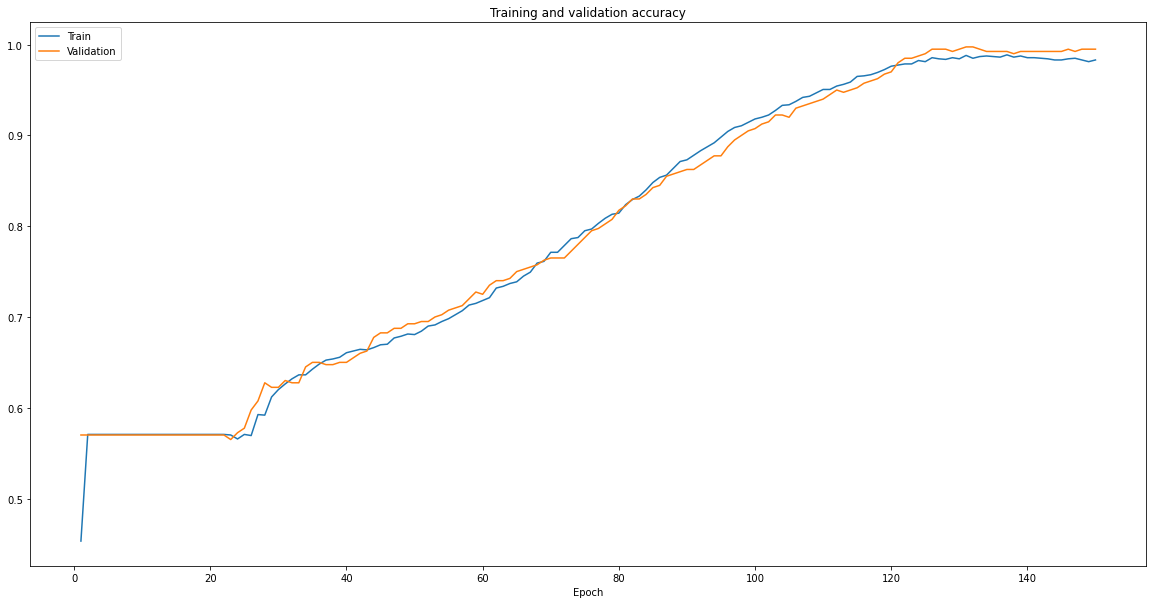

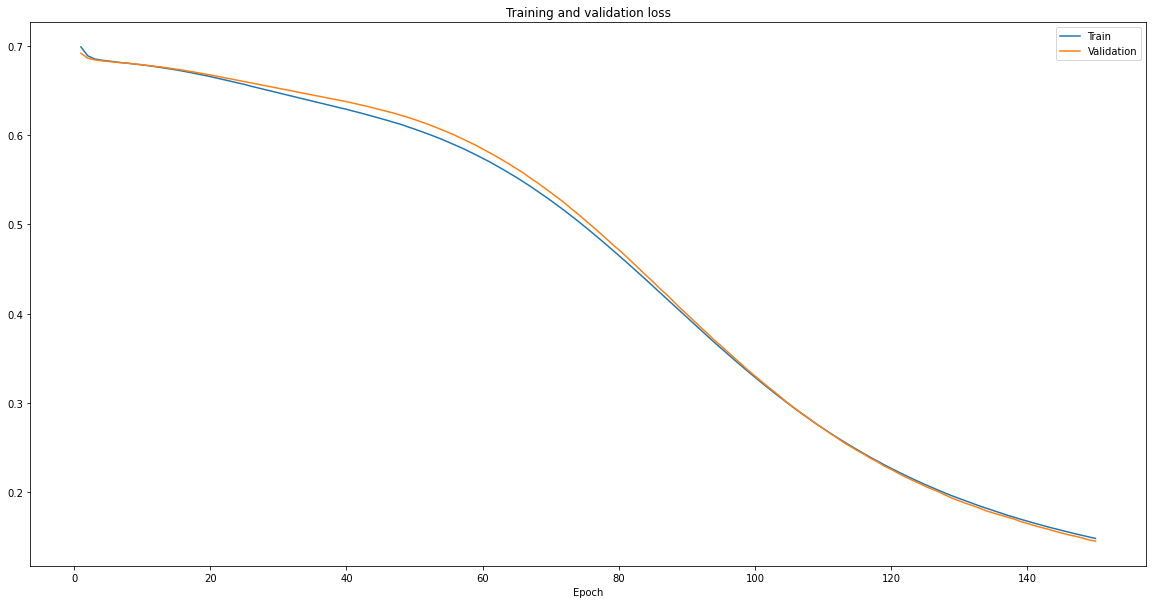

In [70]:
diagnostic_learning_curves(history)

In [42]:
# Prediction
# y_proba = nn.predict(X_test)
# y_proba
# y_pred = nn.predict_classes(X_test)
# y_pred

# Q : Cmnt réaliser des prédictions en évitant le warning de model.predict_classes
# R : 
# UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. 
# Please use instead:* `np.argmax(model.predict(x), axis=-1)`, if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).* 
# `(model.predict(x) > 0.5).astype("int32")`, if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).

# y_pred = (nn.predict(X_test) > 0.5).astype('int32')
# y_pred

pd.DataFrame({'y_proba':y_proba.flatten(), 'y_pred':y_pred.flatten(), 'y_true':y_test})



,y_proba,y_pred,y_true
1939,0.007444,0,0
627,0.015188,0,0
1211,0.017647,0,0
190,0.947211,1,1
1007,0.641440,1,1
...,...,...,...
395,0.011379,0,0
598,0.752652,1,1
1642,0.615515,1,1
1185,0.810363,1,1


In [43]:
# Perfermance en test
score = nn.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9925


[0.14886997640132904, 0.9925000071525574]

In [44]:
metrics.confusion_matrix(y_test, y_pred)

array([[226,   2],
       [  1, 171]], dtype=int64)

In [42]:
metrics.confusion_matrix(y_test, y_pred)

array([[212,  16],
       [ 55, 117]], dtype=int64)

In [38]:
## Dessiner les frontières de décision

x_start = X_train['X1'].min() - 0.01
x_stop = X_train['X1'].max() + 0.01
y_start = X_train['X2'].min() - 0.01
y_stop = X_train['X2'].max() + 0.01

a = np.arange(start = x_start, stop = x_stop, step = 0.01)
b = np.arange(start = y_start, stop = y_stop, step = 0.01)
XX, YY = np.meshgrid(a,b)
YY.shape
input_array = np.array([XX.ravel(), YY.ravel()]).T
labels = (nn2.predict(X_test) > 0.5).astype('int32')

In [39]:
plt.contourf(XX, YY, labels.reshape(XX.shape))
plt.scatter(X_train['X1'], X_train['X2'], c = y_train, edgecolors='red')
# plt.title("data2 ; NN avec 1 couche caché avec {None} \ntx d'erreur = {None}")

ValueError: cannot reshape array of size 500 into shape (102,102)

<AxesSubplot:>

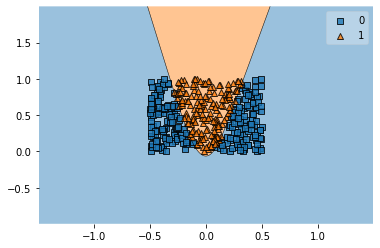

In [25]:
# Plus de facilité avec le pkg mlxtend à l'aide de plot_decision_regions
plot_decision_regions(X_test.values, y_test.values, nn, zoom_factor=1)

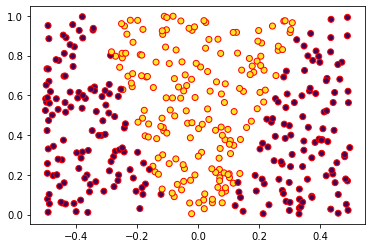

In [81]:
# Alternative que je propose à la construction des frontières de décision 
# (au cas où les frontières de décision ne sont pas évidentes à distinguer dans le graphe 
# Construire un nuage des points de test et les colorer suivant les valeurs de y_pred 
plt.scatter(X_test['X1'], X_test['X2'], c = y_pred.flatten(), edgecolors='red')